# SVM KERNEL PRACTICAL IMPLEMENTATION

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
x=np.linspace(-5.0, 5.0, 100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y, -y])
x=np.hstack([x, -x])

In [14]:
x1=np.linspace(-5.0, 5.0, 100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1, -y1])
x1=np.hstack([x1, -x1])

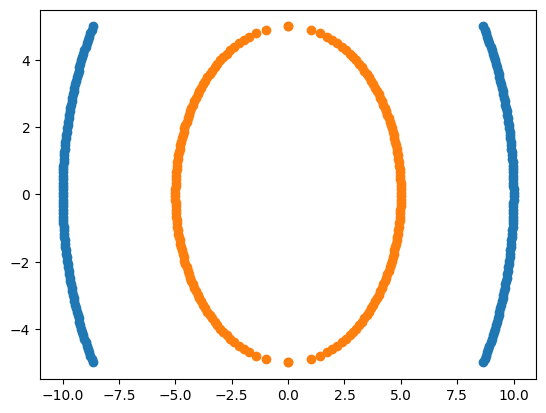

In [15]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [18]:
df1 = pd.DataFrame({'X1': y, 'X2': x})
df1['Y']=0
df2 = pd.DataFrame({'X1': y1, 'X2': x1})
df2['Y']=1

In [41]:
df=df1.append(df2)
df.tail()

<ipython-input-41-39d343d4d923>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [42]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [44]:
X_train

,X1,X2
50,4.999745,0.050505
63,9.906589,1.363636
112,-3.263736,3.787879
159,-9.953852,-0.959596
83,3.680983,3.383838
...,...,...
123,-4.223140,2.676768
192,-9.031653,-4.292929
117,-9.445795,3.282828
47,9.996811,-0.252525


In [45]:
clf=SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

# Polynomial Kernel
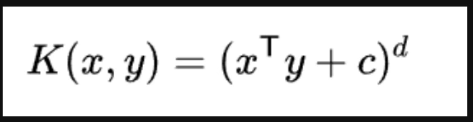

Based on the formula find the components of Polynomial Kernel

In [25]:
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [26]:
X=df[['X1_square','X2_square','X1*X2']]
y=df['Y']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [29]:
import plotly.express as px
fig=px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2', color='Y')
fig.show()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Radial Basis Function Kernel
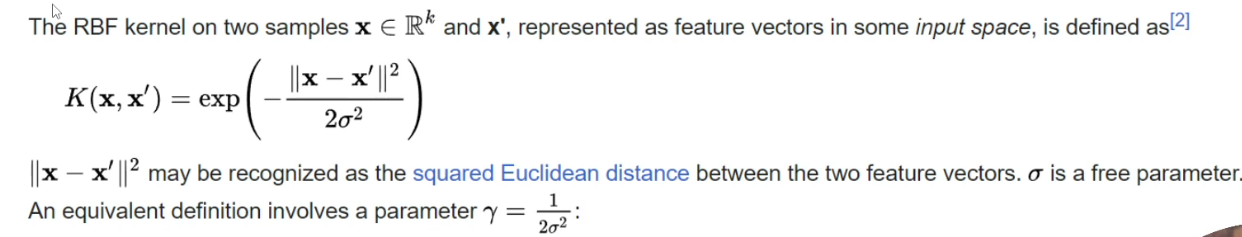

In [31]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [32]:
X=df.iloc[:,0:2]
y=df.Y

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [34]:
clf=SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [35]:
clf=SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.51